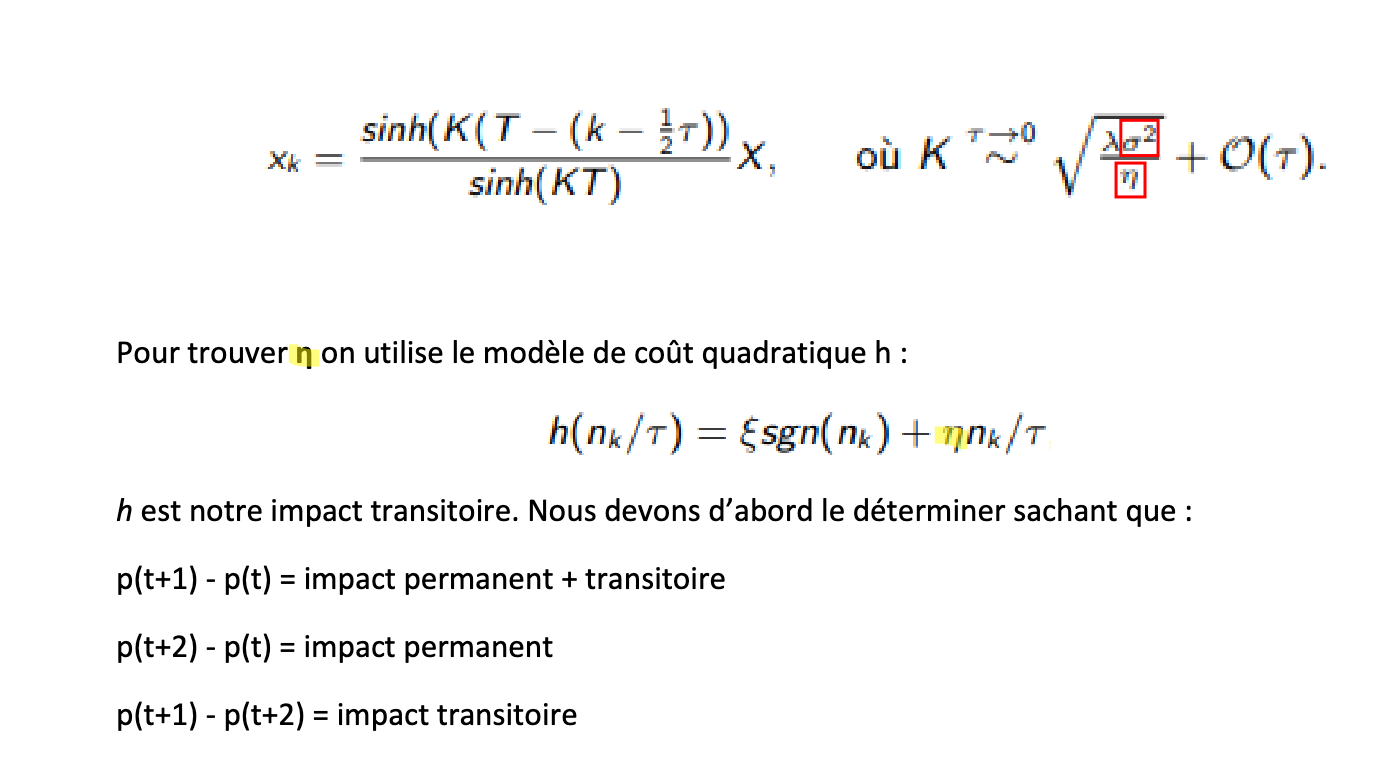

# Cleaning data


In [4]:
import pandas as pd
df=pd.read_excel('/content/Dataset TD4.xlsx')

In [5]:
import pandas as pd
df=pd.read_excel('/content/Dataset TD4.xlsx')

indice_non_nan = df['volume of the transaction (if known)'].dropna().index

indice_tokeep = []
for index in indice_non_nan:
    indice_tokeep.append(index)
    if index + 1 < len(df):
        indice_tokeep.append(index + 1)
    if index + 2 < len(df):
        indice_tokeep.append(index + 2)

df = df.iloc[indice_tokeep].reset_index(drop=True)
df

,transaction date (1=1day=24 hours),bid-ask spread,volume of the transaction (if known),Sign of the transaction,Price (before transaction)
0,0.000202,0.1100,8.0,-1,100.000
1,0.001070,0.1030,NaN,1,99.984
2,0.001496,0.1015,NaN,-1,100.029
3,0.004074,0.1294,32.0,1,100.164
4,0.005494,0.0981,NaN,-1,100.190
...,...,...,...,...,...
405,0.981441,0.0834,79.0,1,101.070
406,0.981875,0.1010,NaN,-1,101.120
407,0.986784,0.1007,NaN,-1,100.998
408,0.991232,0.1153,3.0,-1,100.958


In [10]:


df['H'] = np.nan

for i in df.index[df['volume of the transaction (if known)'].notna()]:
    sum = 0
    prices = []

    for j in range(i+1, len(df)):
        if pd.isna(df.at[j, 'volume of the transaction (if known)']):
            sum += 1
            prices.append(df.at[j, 'Price (before transaction)'])
            if sum == 2:
                break

    if len(prices) == 2:
        df.at[i, 'H'] = prices[0] - prices[1]

df['Time step']= df['transaction date (1=1day=24 hours)'].diff()

df['Vitesse liquidity']=df['volume of the transaction (if known)']/df['Time step']

df['eps * signe']= (df['bid-ask spread']/2)*df['Sign of the transaction']

df['Y']=df['H']-df['eps * signe']

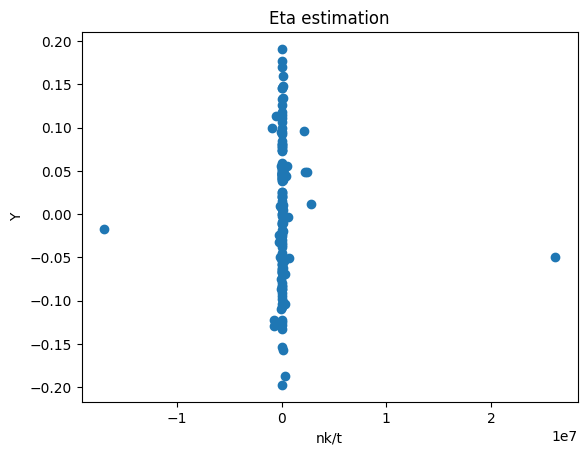

In [12]:
import matplotlib.pyplot as plt


plt.scatter(df['Vitesse liquidity'], df['Y'])
plt.title("Eta estimation")
plt.xlabel("nk/t")
plt.ylabel("Y")
plt.show()



In [13]:
def rem_outlier(df, col):
    quantile1= df[col].quantile(0.25)
    quantile3 = df[col].quantile(0.75)
    I = quantile3 - quantile1

    l_bound = quantile1 - 1.5 * I
    u_bound = quantile3 + 1.5 * I

    condition = (df[col] >= l_bound) & (df[col] <= u_bound)

    return df[condition]


df = rem_outlier(df, 'Vitesse liquidity')


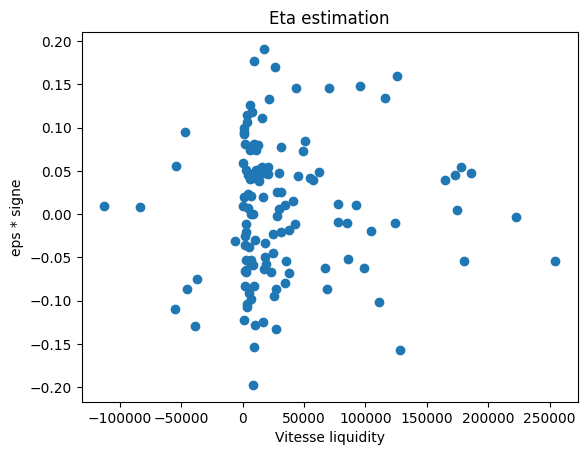

In [14]:
plt.scatter(df['Vitesse liquidity'], df['Y'])
plt.title("Eta estimation")
plt.xlabel("Vitesse liquidity")
plt.ylabel("eps * signe")
plt.show()



In [15]:
sum_x = 0
sum_y = 0
sum_xy = 0
sum_xx = 0
N = 0

df = df.replace([np.inf, -np.inf], np.nan).dropna()

#Methode des moindres carrés
for index, row in df.iterrows():
    x = row['Vitesse liquidity']
    y = row['Y']
    sum_x += x
    sum_y += y
    sum_xy += x * y
    sum_xx += x * x
    N += 1

eta = (N * sum_xy - sum_x * sum_y) / (N * sum_xx - sum_x ** 2)

print("Eta estimated :", eta)


Eta estimated : 6.130483574464865e-08


In [16]:
df=pd.read_excel('/content/Dataset TD4.xlsx')


In [17]:
df['Return'] = df['Price (before transaction)'].pct_change(1)

In [18]:
def mean(df):
    sum = 0
    for i in range(1,len(df)):
        j_1 = df.iloc[i-1]['transaction date (1=1day=24 hours)']
        sum += df.iloc[i]['Return'] / np.sqrt(df.iloc[i]['transaction date (1=1day=24 hours)'] - j_1)
    return sum / len(df)

def std(df):
    sum = 0
    r = mean(df)
    for i in range(1,len(df)):
        j_1 = df.iloc[i-1]['transaction date (1=1day=24 hours)']
        sum += ((df.iloc[i]['Return'] / np.sqrt(df.iloc[i]['transaction date (1=1day=24 hours)'] - j_1) - r) ** 2)
    return np.sqrt(sum / len(df))

volatility = std(df)
print("The volatility is :",volatility*100,"%")

The volatility is : 6.711022380945732 %


# Partie 2

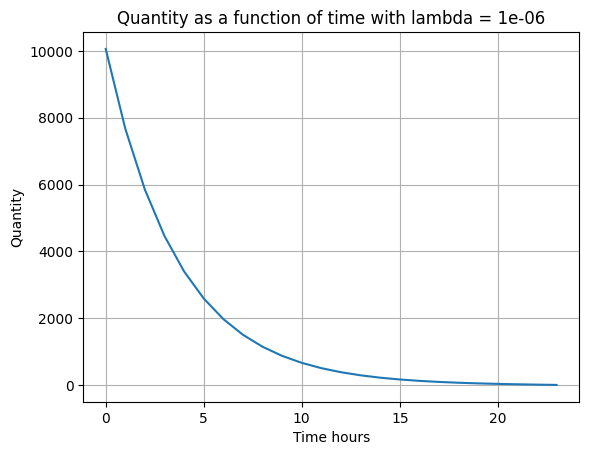

In [19]:

T=24
lamb=10**-6

def Kappa(lamb):
  a=lamb*(volatility**2)

  return np.sqrt(a/eta)

k1=Kappa(lamb)

x_value=[]
X=10000 #Quantity
time=[]
tau=1/24

for i in range(T):

  x_k= ((np.sinh(k1*(T-i+tau/2))))/np.sinh(k1*T) *X
  x_value.append(x_k)
  time.append(i)

plt.plot(time, x_value)
plt.xlabel('Time hours')
plt.ylabel('Quantity')
plt.title(f'Quantity as a function of time with lambda = {lamb}')
plt.grid(True)
plt.show()

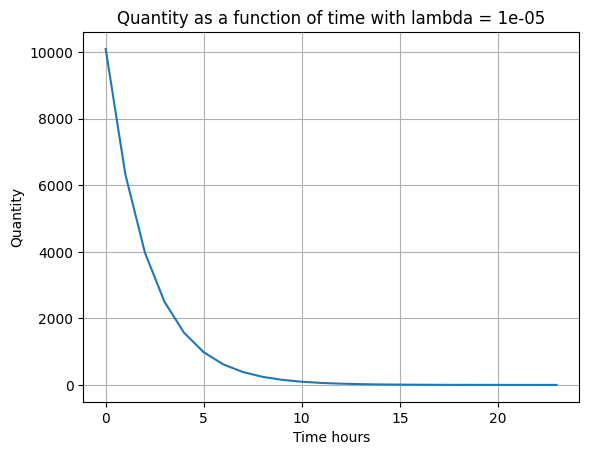

In [258]:
import numpy as np
T=24
lamb=10**-5
sigma_estim= volatility
eta_estim= eta

def Kappa(lamb):
  a=lamb*(volatility**2)

  return np.sqrt(a/eta)

k1=Kappa(lamb)

x_value=[]
X=10000
time=[]
tau=1/24

for i in range(T):

  x_k= ((np.sinh(k1*(T-i+tau/2))))/np.sinh(k1*T) *X
  x_value.append(x_k)
  time.append(i)

plt.plot(time, x_value)
plt.xlabel('Time hours')
plt.ylabel('Quantity')
plt.title(f'Quantity as a function of time with lambda = {lamb}')
plt.grid(True)
plt.show()